In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from math import log
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\DELL\Desktop\Covid19\case_time_series.csv')

In [3]:
df.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January,1,1,0,0,0,0
1,31 January,0,1,0,0,0,0
2,01 February,0,1,0,0,0,0
3,02 February,1,2,0,0,0,0
4,03 February,1,3,0,0,0,0


In [4]:
df.tail()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
136,14 June,11405,333043,7358,169685,324,9522
137,15 June,10032,343075,10639,180324,396,9918
138,16 June,11086,354161,7226,187550,2004,11922
139,17 June,13108,367269,6890,194440,341,12263
140,18 June,13826,381095,10744,205184,343,12606


In [5]:
len(df)

141

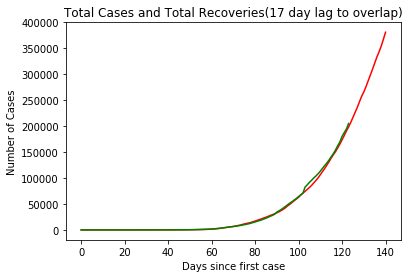

In [6]:
plt.plot(range(len(df.Date)), df['Total Confirmed'], color = 'red')
plt.plot(range(len(df.Date)-17), df['Total Recovered'][17:], color = 'green')
plt.title('Total Cases and Total Recoveries(17 day lag to overlap)')
plt.xlabel('Days since first case')
plt.ylabel('Number of Cases')
plt.show()

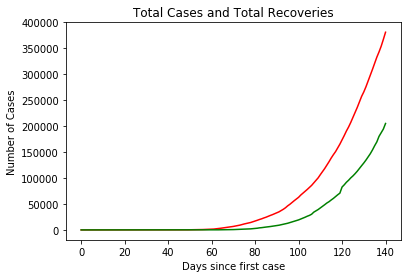

In [7]:
plt.plot(range(len(df.Date)), df['Total Confirmed'], color = 'red')
plt.plot(range(len(df.Date)), df['Total Recovered'], color = 'green')
plt.title('Total Cases and Total Recoveries')
plt.xlabel('Days since first case')
plt.ylabel('Number of Cases')
plt.show()

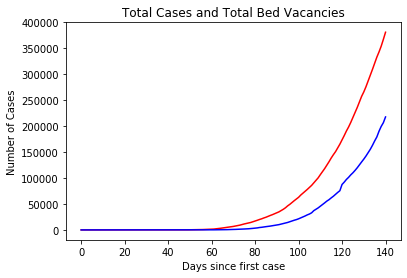

In [8]:
plt.plot(range(len(df.Date)), df['Total Confirmed'], color = 'red')
df['Bed Vacant'] = df['Total Recovered'] + df['Total Deceased']
plt.plot(range(len(df.Date)), df['Bed Vacant'], color = 'blue')
plt.title('Total Cases and Total Bed Vacancies')
plt.xlabel('Days since first case')
plt.ylabel('Number of Cases')
plt.show()

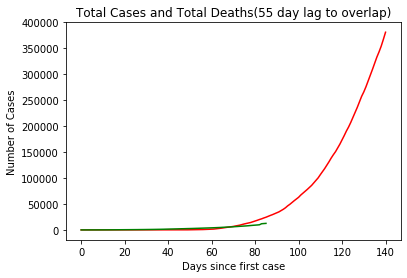

In [9]:
plt.plot(range(len(df.Date)), df['Total Confirmed'], color = 'red')
plt.plot(range(len(df.Date)-55), df['Total Deceased'][55:], color = 'green')
plt.title('Total Cases and Total Deaths(55 day lag to overlap)')
plt.xlabel('Days since first case')
plt.ylabel('Number of Cases')
plt.show()

In [10]:
dbl = []
count = []
t = 1
I = 0
for i in range(len(df.Date)):
    if(df['Total Confirmed'][i] >= 2*t):
        dbl.append(i-I)
        t = df['Total Confirmed'][i]
        count.append(t)
        I = i
print(dbl)
print(count)

[3, 29, 2, 6, 6, 4, 4, 6, 4, 6, 8, 10, 11, 14, 16]
[2, 5, 28, 63, 126, 256, 571, 1326, 3105, 6728, 14354, 29458, 59690, 124759, 257485]


[1.0, 2.321928094887362, 4.807354922057604, 5.977279923499917, 6.977279923499917, 8.0, 9.157346935362844, 10.372865060112588, 11.600377553107844, 12.715961990255144, 13.809165205371881, 14.846371863961608, 15.865201633337167, 16.92878436845242, 17.974128863796974]


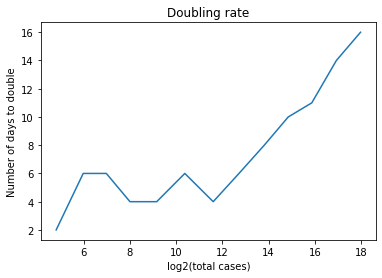

In [11]:
count = [log(x, 2) for x in count]
print(count)
plt.plot(count[2:], dbl[2:])
plt.title('Doubling rate')
plt.ylabel('Number of days to double')
plt.xlabel('log2(total cases)')
plt.show()

In [12]:
st = pd.read_csv(r'C:\Users\DELL\Desktop\Covid19\statewise_tested_numbers_data.csv')
test = pd.read_csv(r'C:\Users\DELL\Desktop\Covid19\tested_numbers_icmr_data.csv')
st.head()

,Updated On,State,Total Tested,Tag (Total Tested),Positive,Negative,Unconfirmed,Cumulative People In Quarantine,Total People Currently in Quarantine,Tag (People in Quarantine),...,Corona Enquiry Calls,Num Calls State Helpline,Source1,Unnamed: 21,Source2,Test positivity rate,Tests per thousand,Tests per million,Tests per positive case,Population NCP 2019 Projection
0,17/04/2020,Andaman and Nicobar Islands,1403.0,Samples Sent,12.0,1210.0,181.0,NaN,NaN,NaN,...,NaN,NaN,https://t.me/indiacovid/2550,NaN,NaN,0.86%,3.53,3534.0,117.0,397000.0
1,24/04/2020,Andaman and Nicobar Islands,2679.0,Samples Sent,27.0,NaN,246.0,NaN,614.0,Institutional,...,NaN,280.0,https://t.me/indiacovid/3147?single,NaN,NaN,1.01%,6.75,6748.0,99.0,397000.0
2,27/04/2020,Andaman and Nicobar Islands,2848.0,Samples Sent,33.0,NaN,106.0,NaN,724.0,Institutional,...,NaN,298.0,https://t.me/indiacovid/3365?single,NaN,NaN,1.16%,7.17,7174.0,86.0,397000.0
3,01/05/2020,Andaman and Nicobar Islands,3754.0,Samples Sent,33.0,NaN,199.0,NaN,643.0,Institutional,...,NaN,340.0,https://t.me/indiacovid/3781,NaN,NaN,0.88%,9.46,9456.0,114.0,397000.0
4,16/05/2020,Andaman and Nicobar Islands,6677.0,Samples Sent,33.0,NaN,136.0,NaN,16.0,Institutional,...,NaN,471.0,https://t.me/indiacovid/4925,NaN,NaN,0.49%,16.82,16819.0,202.0,397000.0


In [13]:
test.head()

,Update Time Stamp,Total Samples Tested,Total Individuals Tested,Total Positive Cases,Tests conducted by Private Labs,Sample Reported today,Positive cases from samples reported,Source,Unnamed: 8,Test positivity rate,Individuals Tested Per Confirmed Case,Tests Per Confirmed Case,Tests per million
0,13/03/2020 00:00:00,6500.0,5900.0,78,NaN,NaN,NaN,Press_Release_ICMR_13March2020.pdf,NaN,1.20%,75.64,83.33,5
1,18/03/2020 18:00:00,13125.0,12235.0,150,NaN,NaN,NaN,ICMR_website_update_18March_6PM_IST.pdf,NaN,1.14%,81.57,87.50,10
2,19/03/2020 10:00:00,13316.0,12426.0,168,NaN,NaN,NaN,ICMR_website_update_19March_10AM_IST_V2.pdf,NaN,1.26%,73.96,79.26,10
3,19/03/2020 18:00:00,14175.0,13285.0,182,NaN,NaN,NaN,ICMR_website_update_19March_6PM_IST.pdf,NaN,1.28%,72.99,77.88,11
4,20/03/2020 10:00:00,14376.0,13486.0,206,NaN,NaN,NaN,ICMR_website_update_20March_10AM_IST.pdf,NaN,1.43%,65.47,69.79,11


In [14]:
test.columns

Index(['Update Time Stamp', 'Total Samples Tested', 'Total Individuals Tested',
       'Total Positive Cases', 'Tests conducted by Private Labs',
       'Sample Reported today', 'Positive cases from samples reported',
       'Source', 'Unnamed: 8', 'Test positivity rate',
       'Individuals Tested Per Confirmed Case', 'Tests Per Confirmed Case',
       'Tests per million'],
      dtype='object')

In [15]:
st.columns

Index(['Updated On', 'State', 'Total Tested', 'Tag (Total Tested)', 'Positive',
       'Negative', 'Unconfirmed', 'Cumulative People In Quarantine',
       'Total People Currently in Quarantine', 'Tag (People in Quarantine)',
       'Total People Released From Quarantine', 'People in ICU',
       'People on Ventilators', 'Num Isolation Beds', 'Num ICU Beds',
       'Num Ventilators', 'Total PPE', 'Total N95 Masks',
       'Corona Enquiry Calls', 'Num Calls State Helpline', 'Source1',
       'Unnamed: 21', 'Source2', 'Test positivity rate', 'Tests per thousand',
       'Tests per million', 'Tests per positive case',
       'Population NCP 2019 Projection'],
      dtype='object')

In [16]:
use = st[['Updated On', 'State', 'Total Tested', 'Positive',
       'Negative', 'Num Isolation Beds', 'Num ICU Beds', 'Num Ventilators', 'Total PPE',
       'Total N95 Masks', 'Test positivity rate',
       'Tests per thousand', 'Tests per positive case']]
use.head()

,Updated On,State,Total Tested,Positive,Negative,Num Isolation Beds,Num ICU Beds,Num Ventilators,Total PPE,Total N95 Masks,Test positivity rate,Tests per thousand,Tests per positive case
0,17/04/2020,Andaman and Nicobar Islands,1403.0,12.0,1210.0,50.0,NaN,NaN,NaN,NaN,0.86%,3.53,117.0
1,24/04/2020,Andaman and Nicobar Islands,2679.0,27.0,NaN,50.0,NaN,NaN,NaN,NaN,1.01%,6.75,99.0
2,27/04/2020,Andaman and Nicobar Islands,2848.0,33.0,NaN,50.0,NaN,NaN,NaN,NaN,1.16%,7.17,86.0
3,01/05/2020,Andaman and Nicobar Islands,3754.0,33.0,NaN,50.0,NaN,NaN,NaN,NaN,0.88%,9.46,114.0
4,16/05/2020,Andaman and Nicobar Islands,6677.0,33.0,NaN,98.0,NaN,NaN,NaN,NaN,0.49%,16.82,202.0


In [17]:
use = use.values.tolist()

In [18]:
dat = []
# use[3][0]
for i in range(len(use)):
    if (use[i][0] == "22/05/2020"):
        dat.append(use[i][:])
dat = pd.DataFrame(data=dat, columns=['Updated On', 'State', 'Total Tested', 'Positive',
       'Negative', 'Num Isolation Beds', 'Num ICU Beds', 'Num Ventilators', 'Total PPE',
       'Total N95 Masks', 'Test positivity rate',
       'Tests per thousand', 'Tests per positive case'])
dat.head()

,Updated On,State,Total Tested,Positive,Negative,Num Isolation Beds,Num ICU Beds,Num Ventilators,Total PPE,Total N95 Masks,Test positivity rate,Tests per thousand,Tests per positive case
0,22/05/2020,Andaman and Nicobar Islands,7263.0,33.0,NaN,98.0,NaN,NaN,NaN,NaN,0.45%,18.29,220.0
1,22/05/2020,Andhra Pradesh,284119.0,2514.0,281452.0,NaN,NaN,NaN,NaN,NaN,0.88%,5.44,113.0
2,22/05/2020,Arunachal Pradesh,4844.0,2.0,4211.0,NaN,NaN,NaN,NaN,NaN,0.04%,3.22,2422.0
3,22/05/2020,Assam,55791.0,259.0,50450.0,3338.0,595.0,332.0,NaN,NaN,0.46%,1.63,215.0
4,22/05/2020,Bihar,58481.0,2098.0,NaN,NaN,NaN,NaN,NaN,NaN,3.59%,0.49,28.0


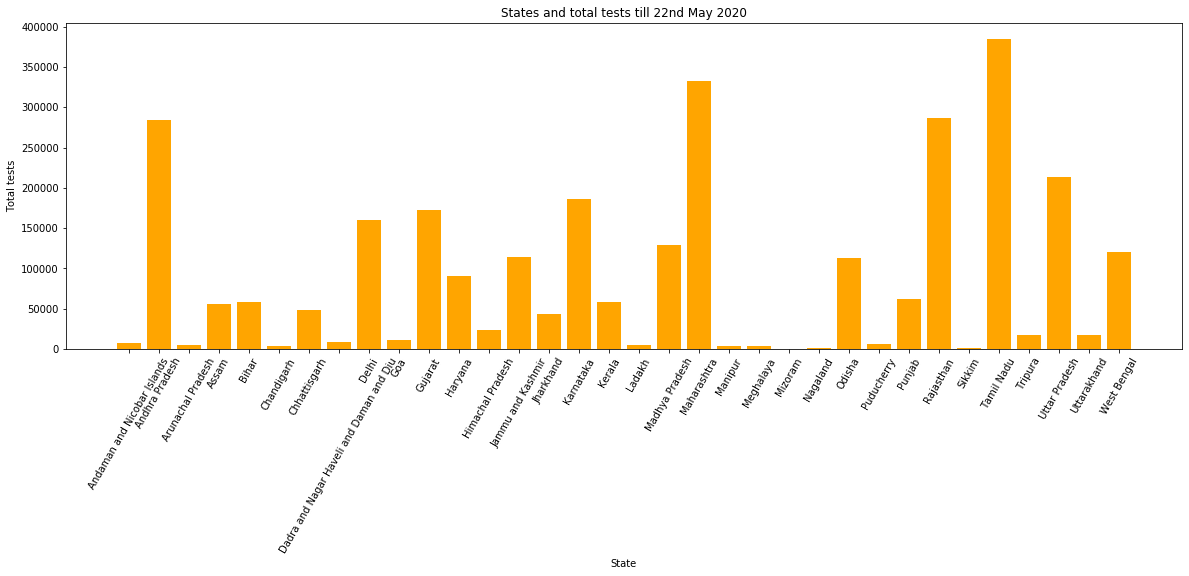

In [19]:
plt.rcParams['figure.figsize'] = (20, 6)
plt.bar(dat['State'], dat['Total Tested'], color = 'orange')
plt.title('States and total tests till 22nd May 2020')
plt.xlabel('State')
plt.xticks(dat['State'], dat['State'], rotation = 60)
plt.ylabel('Total tests')
plt.show()

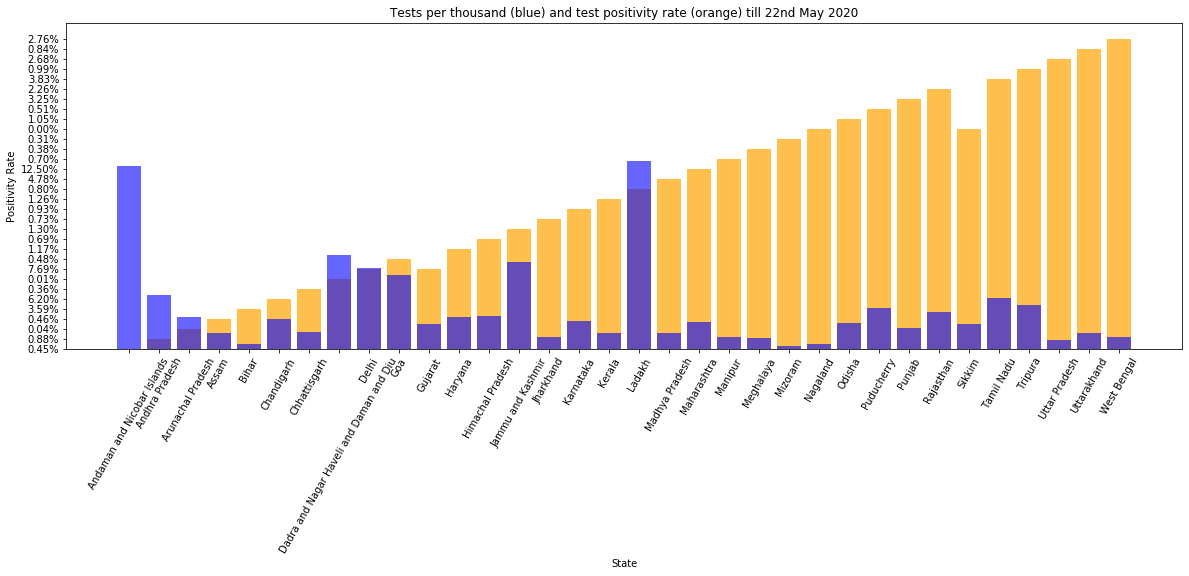

In [20]:
plt.rcParams['figure.figsize'] = (20, 6)
plt.bar(dat['State'], dat['Test positivity rate'], color = 'orange', alpha = 0.7)
plt.bar(dat['State'], dat['Tests per thousand'], color = 'blue', alpha = 0.6)
plt.title('Tests per thousand (blue) and test positivity rate (orange) till 18th June 2020')
plt.xlabel('State')
plt.xticks(dat['State'], dat['State'], rotation = 60)
plt.rc('ytick', labelsize=5)
plt.ylabel('Positivity Rate')
plt.show()

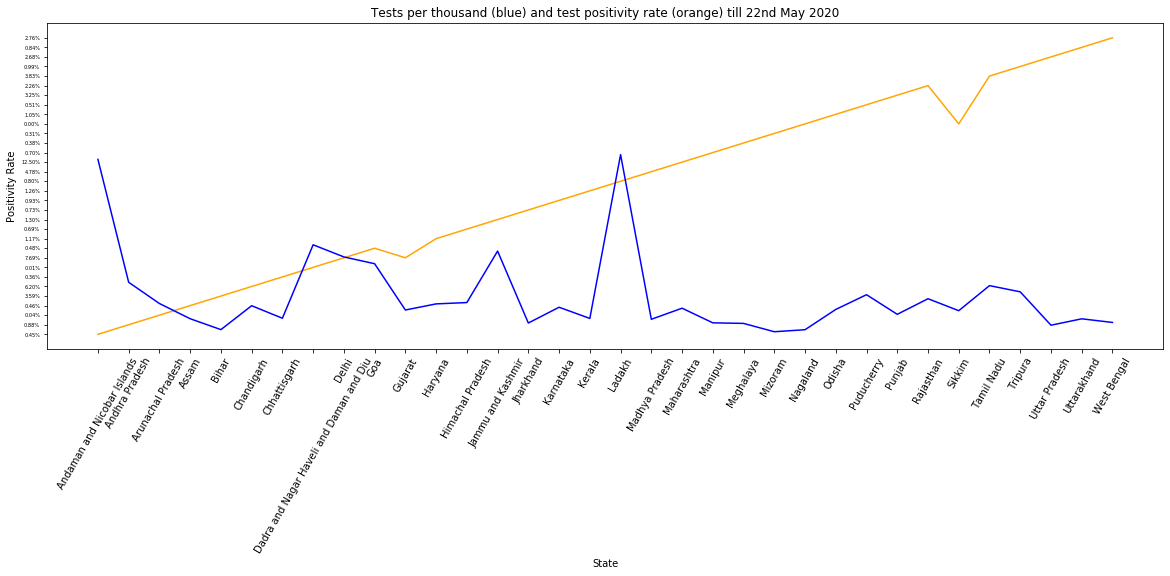

In [21]:
plt.rcParams['figure.figsize'] = (20, 6)
plt.plot(dat['State'], dat['Test positivity rate'], color = 'orange')
plt.plot(dat['State'], dat['Tests per thousand'], color = 'blue')
plt.title('Tests per thousand (blue) and test positivity rate (orange) till 18th June 2020')
plt.xlabel('State')
plt.xticks(dat['State'], dat['State'], rotation = 60)
plt.rc('ytick', labelsize=5)
plt.ylabel('Positivity Rate')
plt.show()

In [22]:
sw = pd.read_csv(r'C:\Users\DELL\Desktop\Covid19\state_wise_daily.csv')
sw.head()

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,Confirmed,81,0,1,0,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,Recovered,9,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,Deceased,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,Confirmed,27,0,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
4,15-Mar-20,Recovered,4,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0


In [23]:
len(sw)

291

In [24]:
sw.tail()

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
286,17-Jun-20,Recovered,6890,0,128,3,231,205,4,165,...,77,505,0,842,44,0,335,38,505,0
287,17-Jun-20,Deceased,341,0,2,0,0,0,0,0,...,6,5,0,48,1,0,30,1,11,0
288,18-Jun-20,Confirmed,13826,1,425,0,209,100,4,82,...,118,315,0,2141,352,21,604,80,435,430
289,18-Jun-20,Recovered,10744,2,131,1,206,185,0,103,...,32,275,1,1017,230,83,399,132,468,0
290,18-Jun-20,Deceased,343,0,2,0,1,5,0,0,...,5,17,0,49,3,0,23,0,12,0


In [25]:
dw = pd.read_csv(r'C:\Users\DELL\Desktop\Covid19\district_wise.csv')
dw.head()

,SlNo,State_Code,State,District_Key,District,Confirmed,Active,Recovered,Deceased,Migrated_Other,Delta_Confirmed,Delta_Active,Delta_Recovered,Delta_Deceased,District_Notes,Last_Updated
0,0,UN,State Unassigned,UN_Unassigned,Unassigned,8898,8898,0,0,0,224,224,0,0,NaN,NaN
1,1,AN,Andaman and Nicobar Islands,AN_Nicobars,Nicobars,0,0,0,0,0,0,0,0,0,NaN,NaN
2,2,AN,Andaman and Nicobar Islands,AN_North and Middle Andaman,North and Middle Andaman,1,0,1,0,0,0,0,0,0,NaN,NaN
3,3,AN,Andaman and Nicobar Islands,AN_South Andaman,South Andaman,35,3,32,0,0,0,0,0,0,NaN,NaN
4,0,AP,Andhra Pradesh,AP_Foreign Evacuees,Foreign Evacuees,287,241,46,0,0,0,0,0,0,NaN,NaN


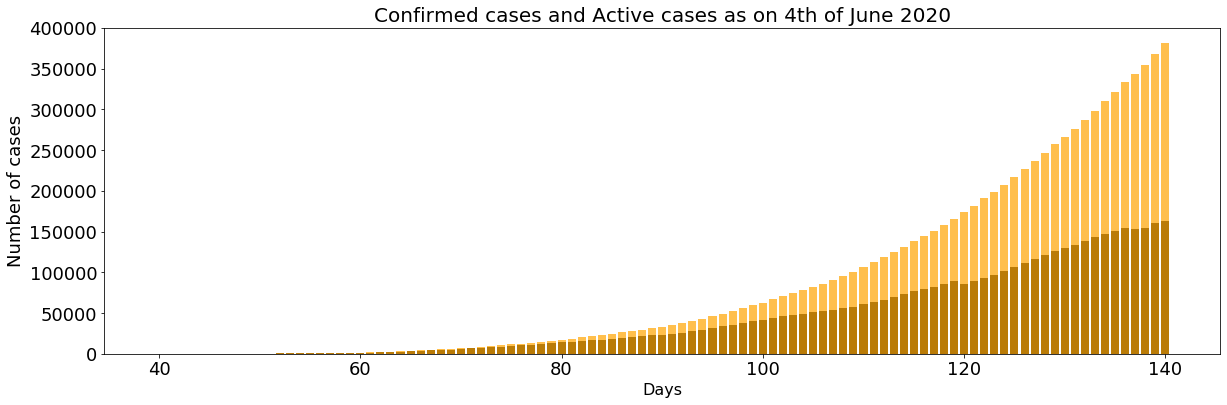

In [26]:
df['Active'] = df['Total Confirmed'] - df['Total Recovered'] - df['Total Deceased']
plt.bar(range(40, len(df)), df['Active'][40:], alpha = 0.9, color = 'black')
plt.bar(range(40, len(df)), df['Total Confirmed'][40:], alpha = 0.7, color = 'orange')
plt.title('Confirmed cases and Active cases as on 4th of June 2020', fontsize = 20)
plt.xlabel('Days', fontsize = 16)
plt.ylabel('Number of cases', fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()

In [27]:
import glob
files = glob.glob(r'C:\Users\DELL\Desktop\Covid19\raw_data*.csv')
df_list = []
for i in files:
    data = pd.read_csv(i)
    df_list.append(data)
df = pd.concat(df_list, sort=True)

In [28]:
df.head()

,Age Bracket,Backup Notes,Contracted from which Patient (Suspected),Current Status,Date Announced,Detected City,Detected District,Detected State,Entry_ID,Estimated Onset Date,...,Num Cases,Num cases,Patient Number,Source_1,Source_2,Source_3,State Patient Number,State code,Status Change Date,Type of transmission
0,20,Student from Wuhan,NaN,Recovered,30/01/2020,Thrissur,Thrissur,Kerala,NaN,NaN,...,NaN,1.0,1.0,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,KL-TS-P1,KL,14/02/2020,Imported
1,NaN,Student from Wuhan,NaN,Recovered,02/02/2020,Alappuzha,Alappuzha,Kerala,NaN,NaN,...,NaN,1.0,2.0,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,KL-AL-P1,KL,14/02/2020,Imported
2,NaN,Student from Wuhan,NaN,Recovered,03/02/2020,Kasaragod,Kasaragod,Kerala,NaN,NaN,...,NaN,1.0,3.0,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,KL-KS-P1,KL,14/02/2020,Imported
3,45,Travel history to Italy and Austria,NaN,Recovered,02/03/2020,East Delhi (Mayur Vihar),East Delhi,Delhi,NaN,NaN,...,NaN,1.0,4.0,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,DL-P1,DL,15/03/2020,Imported
4,24,"Travel history to Dubai, Singapore contact",NaN,Recovered,02/03/2020,Hyderabad,Hyderabad,Telangana,NaN,NaN,...,NaN,1.0,5.0,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,TS-P1,TG,02/03/2020,Imported


In [29]:
df.columns

Index(['Age Bracket', 'Backup Notes',
       'Contracted from which Patient (Suspected)', 'Current Status',
       'Date Announced', 'Detected City', 'Detected District',
       'Detected State', 'Entry_ID', 'Estimated Onset Date', 'Gender',
       'Nationality', 'Notes', 'Num Cases', 'Num cases', 'Patient Number',
       'Source_1', 'Source_2', 'Source_3', 'State Patient Number',
       'State code', 'Status Change Date', 'Type of transmission'],
      dtype='object')

In [30]:
dfa = df[['Age Bracket', 'Date Announced', 'Status Change Date']]
dfa = dfa.dropna()
len(dfa)

2344

In [31]:
def days(f):
    f = str(f)
    date = f[0:2]
    month = f[3:5]
    date = int(date)
    month = int(month)
    if(month == 1):
        return date
    elif(month == 2):
        return (date+31)
    elif(month == 3):
        return (date+60)
    elif(month == 4):
        return (date+91)
    elif(month == 5):
        return (date+121)
    else:
        return (date+152)
hakuna = dfa['Date Announced'].tolist()
matata = dfa['Status Change Date'].tolist()
start = [days(i) for i in hakuna]
end = [days(i) for i in matata]
diff = [x-y for x, y in zip(end, start)]

In [32]:
print(diff[0:5])
print(len(diff))

[15, 13, 0, 0, 25]
2344


In [33]:
dif = []
index = []
for i in range(len(diff)):
    if(diff[i] > 0):
        dif.append(diff[i])
        index.append(i)

In [34]:
# print(dif)
# print(len(dif))

In [35]:
dfa['Age Bracket'].value_counts

<bound method IndexOpsMixin.value_counts of 0        20
3        45
4        24
5        69
6        55
         ..
9459     26
9460     25
10582    12
10583    13
10584    17
Name: Age Bracket, Length: 2344, dtype: object>

In [36]:
print(len(dfa['Age Bracket']))

2344


In [37]:
AGE = (dfa['Age Bracket']).tolist()
age = []
for i in range(len(index)):
    age.append(AGE[i])
days = dif
for i in range(len(age)):
    if((age[i]=='28-35')or(age[i]=='1.5')):
        age[i] = 31
age = [int(x) for x in age]
days = [int(x) for x in days]
# print(age)
# print(len(age))
# print(days)
# print(len(days))
# plt.plot(age, days)
# plt.show()

In [38]:
un = np.unique(age)
avg = []
for i in un:
    value = 0
    count = 0
    for j in range(len(age)):
        if(age[j]==i):
            value += days[j]
            count += 1
    avg.append(value/count)
# print(un)    
# print(avg)

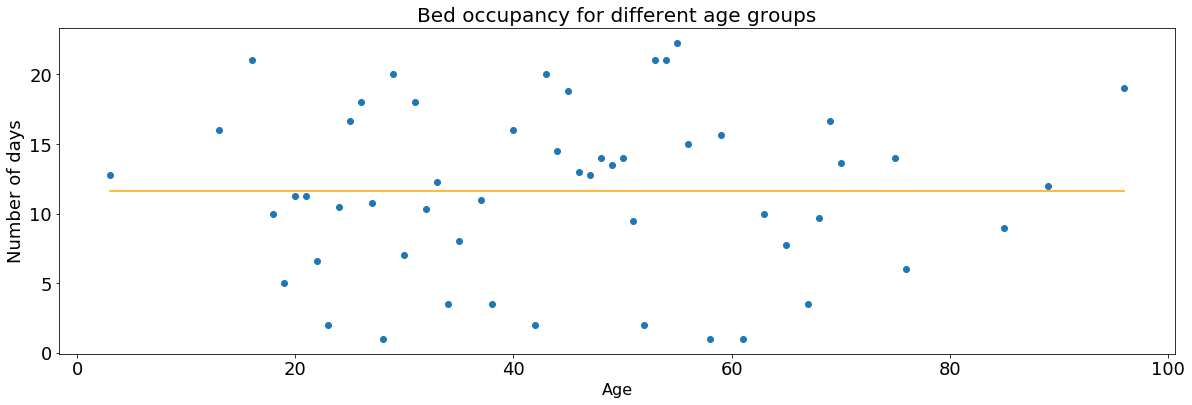

In [39]:
plt.scatter(un, avg)
mean = np.mean(avg)
mn = [mean]*len(avg)
plt.plot(un, mn, color = 'orange')
plt.title('Bed occupancy for different age groups', fontsize = 20)
plt.xlabel('Age', fontsize = 16)
plt.ylabel('Number of days', fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()

In [40]:
dw = dw[dw.District != 'Unassigned']
dw = dw[dw.District != 'Unknown']
dw = dw[['District', 'Confirmed', 'Active', 'Recovered']]
dw.head()

,District,Confirmed,Active,Recovered
1,Nicobars,0,0,0
2,North and Middle Andaman,1,0,1
3,South Andaman,35,3,32
4,Foreign Evacuees,287,241,46
5,Anantapur,642,431,205


In [41]:
print(dw[dw.District == 'Bhopal'])

    District  Confirmed  Active  Recovered
402   Bhopal       2382     641       1668


In [42]:
dw = dw.dropna()

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


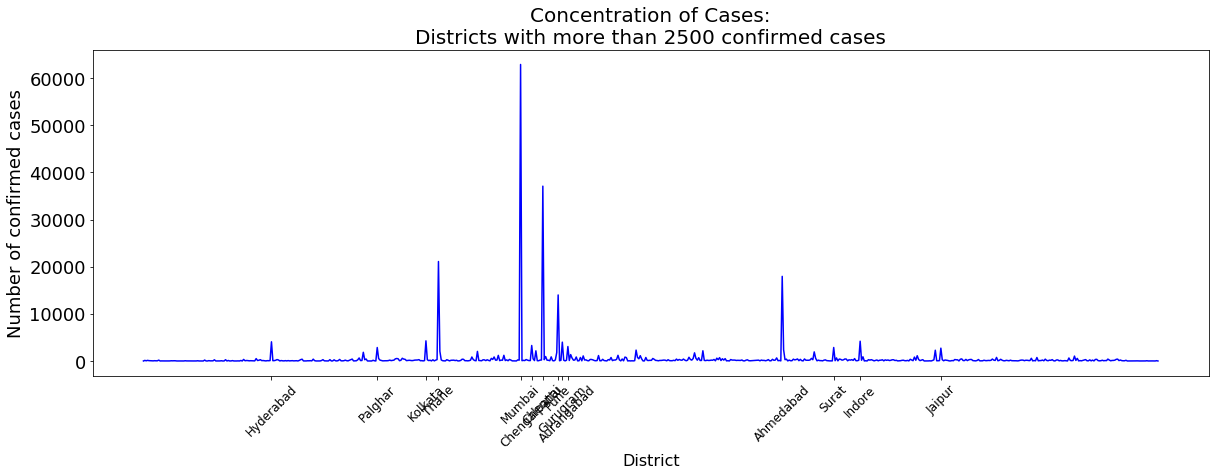

In [48]:
plt.plot(range(len(dw)), dw.Confirmed, color='blue')
plt.title('Concentration of Cases:\nDistricts with more than 2500 confirmed cases', fontsize = 20)
plt.xlabel('District', fontsize = 16)
ax = plt.subplot()
con = dw.Confirmed.tolist()
dis = dw.District.tolist()
city = []
ind = []
for i in range(len(dw)):
    if(con[i]>=2500):
        city.append(dis[i])
        ind.append(i)
ax.set_xticks(ind)
ax.set_xticklabels(city)
plt.ylabel('Number of confirmed cases', fontsize = 18)
plt.xticks(fontsize = 12, rotation=45)
plt.yticks(fontsize = 18)
plt.show()

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


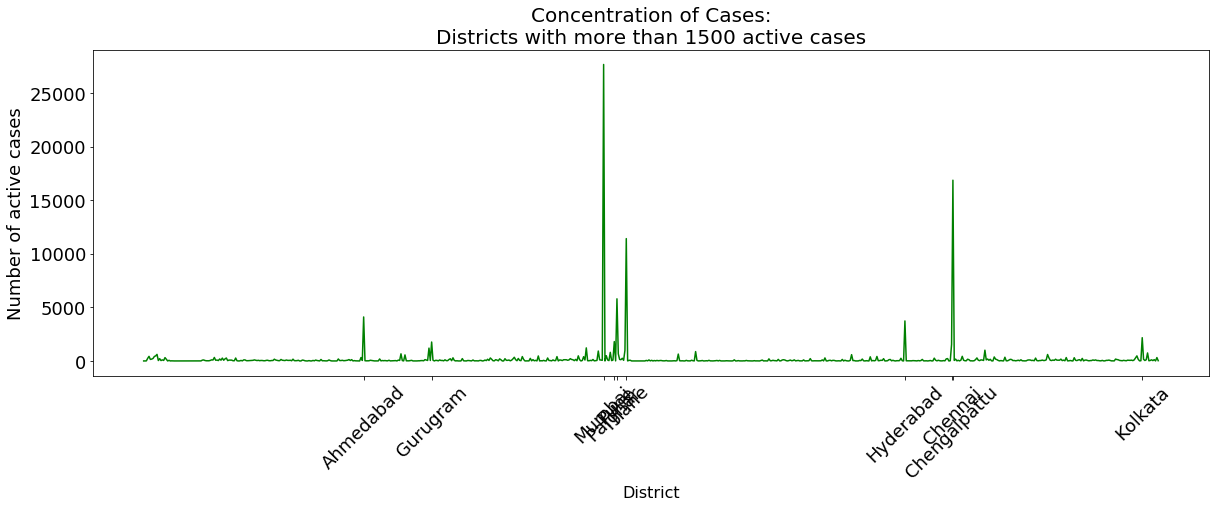

In [44]:
plt.plot(range(len(dw)), dw.Active, color='green')
plt.title('Concentration of Cases:\nDistricts with more than 1500 active cases', fontsize = 20)
plt.xlabel('District', fontsize = 16)
ax = plt.subplot()
con = dw.Active.tolist()
dis = dw.District.tolist()
city = []
ind = []
for i in range(len(dw)):
    if(con[i]>=1500):
        city.append(dis[i])
        ind.append(i)
ax.set_xticks(ind)
ax.set_xticklabels(city)
plt.ylabel('Number of active cases', fontsize = 18)
plt.xticks(fontsize = 18, rotation=45)
plt.yticks(fontsize = 18)
plt.show()

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


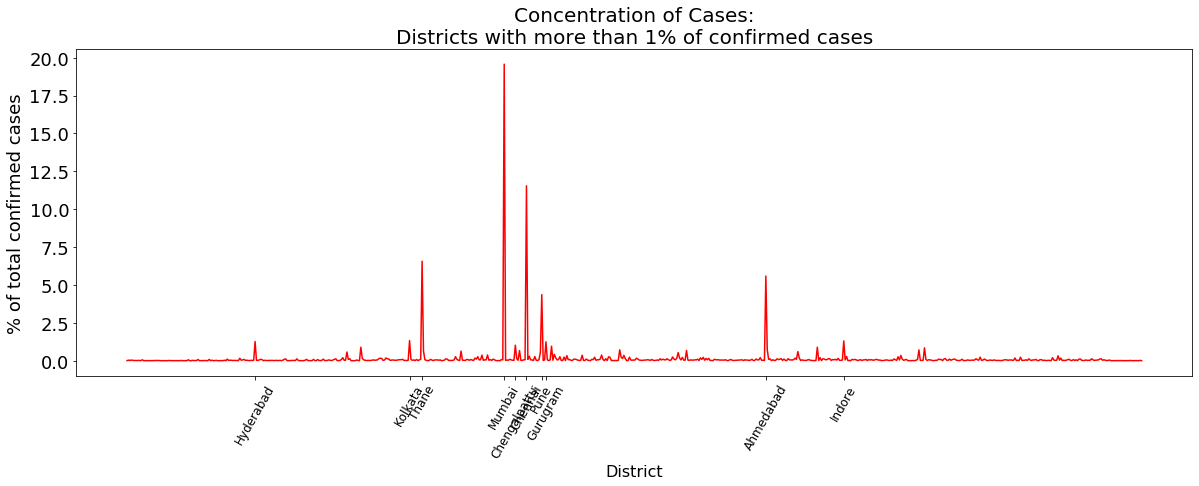

In [49]:
agg = dw.Confirmed.sum()
dw['Percent'] = 100*(dw.Confirmed/agg)
plt.plot(range(len(dw)), dw.Percent, color='red')
plt.title('Concentration of Cases:\nDistricts with more than 1% of confirmed cases', fontsize = 20)
plt.xlabel('District', fontsize = 16)
ax = plt.subplot()
con = dw.Percent.tolist()
dis = dw.District.tolist()
city = []
ind = []
for i in range(len(dw)):
    if(con[i]>=1):
        city.append(dis[i])
        ind.append(i)
ax.set_xticks(ind)
ax.set_xticklabels(city)
plt.ylabel('% of total confirmed cases', fontsize = 18)
plt.xticks(fontsize = 12, rotation=60)
plt.yticks(fontsize = 18)
plt.show()

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


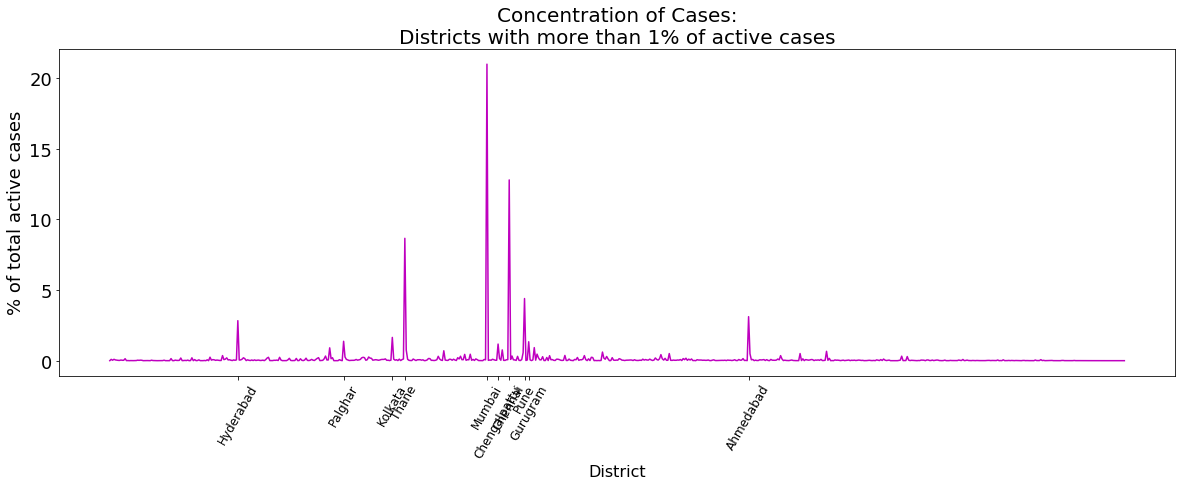

In [50]:
agg = dw.Active.sum()
dw['Percent'] = 100*(dw.Active/agg)
plt.plot(range(len(dw)), dw.Percent, color='m')
plt.title('Concentration of Cases:\nDistricts with more than 1% of active cases', fontsize = 20)
plt.xlabel('District', fontsize = 16)
ax = plt.subplot()
con = dw.Percent.tolist()
dis = dw.District.tolist()
city = []
ind = []
for i in range(len(dw)):
    if(con[i]>=1):
        city.append(dis[i])
        ind.append(i)
ax.set_xticks(ind)
ax.set_xticklabels(city)
plt.ylabel('% of total active cases', fontsize = 18)
plt.xticks(fontsize = 12, rotation=60)
plt.yticks(fontsize = 18)
plt.show()

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


['Jodhpur', 'Jaipur', 'Chandigarh', 'Ajmer', 'Neemuch', 'Ganjam', 'Mandya', 'Nagaur', 'Kolhapur', 'Burhanpur', 'Udaipur', 'Udupi', 'Kota', 'Jajpur', 'Ariyalur', 'Jhalawar', 'Dungarpur']


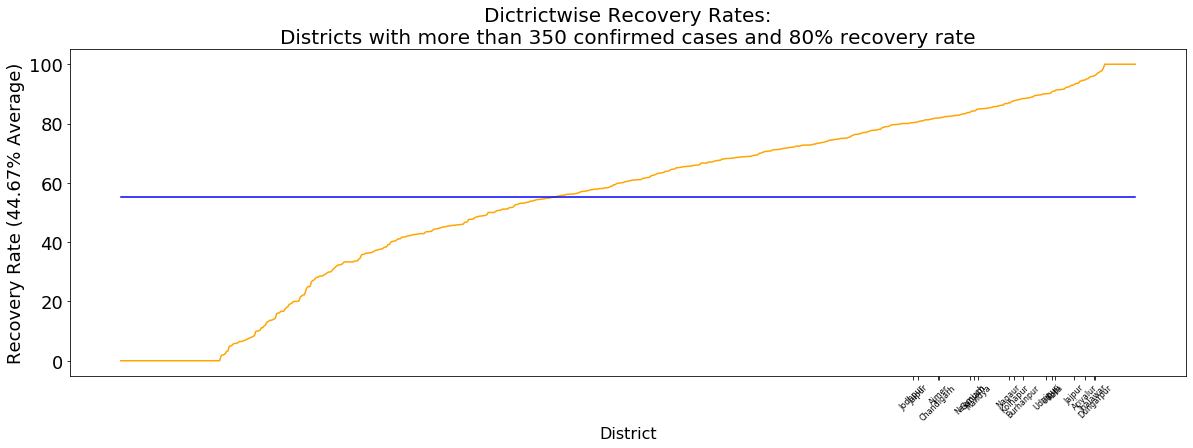

In [47]:
dw = dw[dw.Confirmed != 0]
dw['Recovery'] = 100*(dw.Recovered/dw.Confirmed)
dw = dw[dw['Recovery'] <= 100]
dw = dw.sort_values(by = ['Recovery'])
con = dw.Recovery.tolist()
dis = dw.District.tolist()
conf = dw.Confirmed.tolist()
l = np.mean(con)
avgr = [l]*len(dw)
plt.plot(range(len(dw)), dw.Recovery, color='orange')
plt.plot(range(len(dw)), avgr, color='blue')
plt.title('Dictrictwise Recovery Rates:\nDistricts with more than 350 confirmed cases and 80% recovery rate', fontsize = 20)
plt.xlabel('District', fontsize = 16)
ax = plt.subplot()
city = []
ind = []
for i in range(len(dw)):
    if((con[i]>=80)and(conf[i]>=350)):
        city.append(dis[i])
        ind.append(i)
print(city)
ax.set_xticks(ind)
ax.set_xticklabels(city)
plt.ylabel('Recovery Rate (44.67% Average)', fontsize = 18)
plt.xticks(fontsize = 8, rotation=45)
plt.yticks(fontsize = 18)
plt.show()